In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import random
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
diffgene=pd.read_csv("Differ_exp_genes_aml.csv",header=0) 
diffgene.rename(columns={'Unnamed: 0': 'Genes'}, inplace=True)
#diffgene = diffgene.reset_index(drop=True)
diffgene=diffgene.T
diffgenecopy=diffgene.copy()
diffgene=diffgene.set_axis(diffgene.iloc[0],axis=1)
diffgene=diffgene[1:]
diffgene=diffgene.iloc[:-6]
diffgene.reset_index(inplace=True)
diffgene.rename(columns={'index': 'Sample'}, inplace=True)
diffgene

Genes,Sample,1007_s_at,121_at,1255_g_at,1294_at,1320_at,1405_i_at,1438_at,1552257_a_at,1552263_at,...,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM1211898,1266.21953,3834.768552,53.805957,1281.745676,62.105844,41.340515,37.173229,466.684802,413.888812,...,5471.392566,32973.19687,23473.98161,69093.61589,52597.78228,12.029072,15.881275,19.676128,14.531917,2.04816
1,GSM1211899,1342.806474,4029.934654,95.940922,1219.098484,103.730439,68.604568,50.778006,459.104116,588.885602,...,3813.480463,19794.73751,14527.42439,41398.1443,31970.07484,4.368643,7.311643,4.281044,8.637536,3.337525
2,GSM1211903,749.041873,3262.638269,54.472197,846.734478,49.537914,1303.810699,31.679415,539.83426,657.853219,...,4322.87153,25996.96756,18875.08236,52622.18571,43519.47784,21.928267,71.668063,11.255688,63.153743,3.761171
3,GSM1211904,474.06198,2909.692665,24.325469,1373.058067,47.104255,6016.37946,99.435697,717.909138,1118.91195,...,3005.302178,16586.00022,11889.36974,36001.82963,28847.79176,23.219445,73.517837,33.504441,60.325774,4.975608
4,GSM1211905,1335.080018,2317.439857,86.675615,1123.550037,22.897225,1069.520873,27.344827,764.690502,763.121958,...,5391.923312,23439.72598,19355.24584,48488.24212,38815.41799,146.722524,54.496759,43.295301,28.651384,4.776609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,GSM243870,928.5,3524.5,108.2,548.4,34.8,88.9,57.4,729.5,534.6,...,2814.8,17114.4,11763.9,45907.4,34573.1,32.0,18.4,13.3,55.7,10.2
714,GSM243871,371.2,1175.7,30.0,188.4,9.2,50.7,25.8,1566.6,244.2,...,2126.5,15426.1,11292.4,35758.6,26115.2,28.1,15.4,10.3,9.0,14.9
715,GSM243872,465.9,2134.2,65.6,1226.7,15.3,290.8,215.1,1262.3,167.0,...,1137.0,7932.2,5762.4,21484.2,15155.0,25.7,62.7,4.5,8.7,10.1
716,GSM243873,1306.3,5536.3,72.4,528.5,51.3,173.3,397.9,892.0,253.2,...,3169.3,16739.8,15542.4,56008.9,38950.6,39.0,122.4,28.9,18.1,22.8


In [4]:
sub=pd.read_csv("Subtypes1.csv")
sub.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
merged_diff = pd.merge(diffgene, sub[['Sample', 'non_met']], on='Sample', how='left')
merged_diff.rename(columns={'non_met':'Subtype'},inplace=True)
merged_diff['Class']=''
merged_diff['Class']=merged_diff['Subtype'].apply(lambda x : 0 if x == 'Normal' else 1 if x=='CLL/SLL' else 2 if x=='FL' else 3 if x=='MZL' else 4 if x=='Other' else 5 if x=='LPL' else 6 if x=='MCL' else 5 if x == 'LPL/WM' else 'None') 
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
sub=['Normal','CLL/SLL','FL','MZL','Other','LPL/WM','MCL']
cl=[0,1,2,3,4,5,6]
subclasses=pd.DataFrame({'Subtypes':sub,'Class':cl})
merged_diff.head(300)

,Sample,1007_s_at,121_at,1255_g_at,1294_at,1320_at,1405_i_at,1438_at,1552257_a_at,1552263_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,Subtype,Class
0,GSM1211898,1266.21953,3834.768552,53.805957,1281.745676,62.105844,41.340515,37.173229,466.684802,413.888812,...,23473.98161,69093.61589,52597.78228,12.029072,15.881275,19.676128,14.531917,2.04816,Normal,0
1,GSM1211899,1342.806474,4029.934654,95.940922,1219.098484,103.730439,68.604568,50.778006,459.104116,588.885602,...,14527.42439,41398.1443,31970.07484,4.368643,7.311643,4.281044,8.637536,3.337525,Normal,0
2,GSM1211903,749.041873,3262.638269,54.472197,846.734478,49.537914,1303.810699,31.679415,539.83426,657.853219,...,18875.08236,52622.18571,43519.47784,21.928267,71.668063,11.255688,63.153743,3.761171,CLL/SLL,1
3,GSM1211904,474.06198,2909.692665,24.325469,1373.058067,47.104255,6016.37946,99.435697,717.909138,1118.91195,...,11889.36974,36001.82963,28847.79176,23.219445,73.517837,33.504441,60.325774,4.975608,CLL/SLL,1
4,GSM1211905,1335.080018,2317.439857,86.675615,1123.550037,22.897225,1069.520873,27.344827,764.690502,763.121958,...,19355.24584,48488.24212,38815.41799,146.722524,54.496759,43.295301,28.651384,4.776609,CLL/SLL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,GSM2087769,6.844939,7.552813,3.502006,8.646722,4.014222,7.902232,4.791771,7.12648,7.367361,...,11.728663,13.413839,13.228323,4.419076,3.658128,3.123255,3.59435,3.289706,Other,4
296,GSM2087770,7.80539,7.176855,3.490462,8.396123,3.888012,9.625497,4.780109,6.961514,6.186679,...,12.218152,13.650177,13.476403,4.187666,3.591765,3.06205,3.713675,3.504222,Other,4
297,GSM2087771,7.147748,7.42193,3.507094,7.591445,4.059669,8.287764,4.847271,6.489178,6.756446,...,12.379428,13.785723,13.597504,4.22551,3.723599,2.993273,3.506005,3.357175,Other,4
298,GSM2087772,7.42991,7.254227,3.436226,8.222676,3.879604,7.899082,4.858759,7.001614,7.828552,...,11.844939,13.478696,13.345481,3.914028,3.705025,3.265368,3.594514,3.270231,CLL/SLL,1


,Unnamed: 0,x
0,1,ELL2
1,2,CNR1
2,3,COL1A1
3,4,TCF4
4,5,CNR1
5,6,DUSP4
6,7,NEB
7,8,IGHM
8,9,ARHGAP44
9,10,TGFBR3


In [5]:
merged_diff['Subtype'].unique()

array(['Normal', 'CLL/SLL', 'FL', 'MZL', 'Other', 'LPL', 'MCL', 'LPL/WM'],
      dtype=object)

In [6]:
subclasses
sub[1]

'CLL/SLL'

In [7]:
#print(merged_diff.shape)
#Splitting the dataset into X and Y
X=merged_diff.iloc[:,1:len(merged_diff.columns)-2]
Y=merged_diff.iloc[:,len(merged_diff.columns)-1]

#Scaling the X and Y
scaler=StandardScaler()
X_array=X.values
scaleX=scaler.fit_transform(X_array)
Scale_X=pd.DataFrame(scaleX,columns=X.columns)
#print(Y.head(300))
#X.head(300)

In [8]:
#Checking for Class Imbalance
Scale_X
#Y.value_counts()
#Y.shape

,1007_s_at,121_at,1255_g_at,1294_at,1320_at,1405_i_at,1438_at,1552257_a_at,1552263_at,1552264_a_at,...,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1.341301,1.996110,0.794604,1.178725,1.184852,-0.225254,0.025369,0.363992,0.283649,1.343985,...,0.872676,1.032607,0.938477,0.743120,0.758632,-0.280504,-0.281670,0.444551,-0.024666,-0.467089
1,1.467999,2.131653,1.944261,1.080269,2.392961,-0.221516,0.242828,0.345285,0.732499,0.592892,...,0.413147,0.341501,0.317694,0.168537,0.187635,-0.288929,-0.297337,-0.413845,-0.288919,-0.333573
2,0.485738,1.598762,0.812783,0.495068,0.820082,-0.052170,-0.062445,0.544499,0.909394,1.230950,...,0.554336,0.666759,0.619369,0.401396,0.507335,-0.269618,-0.179682,-0.024954,2.155113,-0.289704
3,0.030840,1.353640,-0.009774,1.322230,0.749447,0.593919,1.020576,0.983926,2.091965,2.360186,...,0.189141,0.173228,0.134645,0.056583,0.101207,-0.268198,-0.176300,1.215588,2.028332,-0.163946
4,1.455217,0.942317,1.691456,0.930107,0.046865,-0.084291,-0.131729,1.099367,1.179398,0.979837,...,0.850649,0.532651,0.652687,0.315631,0.377122,-0.132372,-0.211074,1.761506,0.608328,-0.184553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.782614,1.780627,2.278751,0.026210,0.392330,-0.218734,0.348675,1.012529,0.593262,-0.060836,...,0.136339,0.200938,0.125939,0.262088,0.259690,-0.258541,-0.277066,0.089032,1.820952,0.377049
714,-0.139324,0.149374,0.145057,-0.539561,-0.350683,-0.223971,-0.156422,3.078202,-0.151586,0.035877,...,-0.054440,0.112400,0.093222,0.051537,0.025566,-0.262830,-0.282550,-0.078241,-0.272669,0.863743
715,0.017338,0.815056,1.116406,1.092216,-0.173637,-0.191054,2.869361,2.327295,-0.349596,-0.471113,...,-0.328703,-0.280596,-0.290493,-0.244606,-0.277824,-0.265469,-0.196077,-0.401637,-0.286119,0.366694
716,1.407606,3.177831,1.301944,-0.005065,0.871224,-0.207163,5.791247,1.413523,-0.128502,-0.064182,...,0.234597,0.181293,0.388121,0.471658,0.380864,-0.250842,-0.086934,0.958855,0.135296,1.681803


In [9]:
#Splitting the X  and Y in Train and Test
Y=LabelEncoder().fit_transform(Y)
X_train,X_test,Y_train,Y_test=train_test_split(Scale_X,Y,test_size=1/3,stratify=Y,random_state=0)
#Y.shape

In [10]:
#Resolving Multiclass imbalance using SMOTE on the X_train alone 
#and that also after the splitting to prevent the leak of the class balancing into the test set
smote=SMOTE(k_neighbors=3)
#adasyn = ADASYN(random_state=20)
Xr, Yr=smote.fit_resample(X_train,Y_train)
uni_y,co=np.unique(Yr,return_counts=True)
for x, y in zip(uni_y,co):
    print(f"Class {x}:{y}")
# uni_y=np.unique(Y)
# for i in uni_y:
#     Xx=X_train[Y_train==i]
#     Yy=Y_train[Y_train==i]
#     if len(np.unique(Yy)) > 1:
#         xr,yr=adasyn.fit_resample(Xx,Yy)
#         Y_trainr.append(Yr)
#         print("HI")
#         print(Y_trainr)
#Y_trainr=np.concatenate(Y_trainr)
#X_trainr,Y_trainr=adasyn.fit_resample(X_train,Y_train)
#Y.value_counts()

Class 0:172
Class 1:172
Class 2:172
Class 3:172
Class 4:172
Class 5:172
Class 6:172


In [11]:
print(X_test.shape)
print(Xr.shape)

(240, 26173)
(1204, 26173)


In [13]:
#So our final train and test sets are Xr, X_test and Yr, Y_test

In [12]:
#Application of the Machine Learning
estimators_list=[100,400,550]
for est in estimators_list:
    gb_classifier=GradientBoostingClassifier(n_estimators=est, max_features=8, random_state=1)
    gb_classifier.fit(Xr,Yr)
    probs = gb_classifier.predict_proba(X_test)

    # Extract the probabilities of the positive class
    positive_class_probs = probs
    #print(probs.shape)

    # Calculate the AUC score
    auc_score = roc_auc_score(Y_test, positive_class_probs,multi_class='ovr')

    print('Number of estimators: ', est)
    print('AUC score: ', auc_score)
    print('---------------------------------------------------------')

Number of estimators:  100
AUC score:  0.9735184271516795
---------------------------------------------------------
Number of estimators:  400
AUC score:  0.9805428262687237
---------------------------------------------------------
Number of estimators:  550
AUC score:  0.9805428262687237
---------------------------------------------------------


In [13]:
#Using the determined number of estimator
estimator=GradientBoostingClassifier(n_estimators=500, max_features=8,random_state=1)
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [14]:
probabilities=cross_val_predict(estimator,Xr,Yr,cv=kfold,method='predict_proba')

In [15]:
#Train probabilities
probabilities

array([[4.63450118e-09, 5.06383602e-08, 8.05473638e-08, ...,
        9.99998222e-01, 2.24369138e-09, 1.05136227e-06],
       [2.05449466e-08, 6.59669959e-08, 7.86979835e-12, ...,
        1.87696099e-11, 9.99999913e-01, 4.95176494e-11],
       [7.82530216e-12, 2.58591848e-10, 9.99999994e-01, ...,
        3.73854929e-10, 2.41568086e-12, 1.19212319e-09],
       ...,
       [5.31225560e-10, 3.35470853e-09, 8.25464716e-10, ...,
        2.60269024e-09, 2.10803158e-10, 9.99999992e-01],
       [1.93295093e-09, 1.23903084e-08, 1.17253663e-09, ...,
        2.72740469e-08, 6.99897370e-10, 9.99999952e-01],
       [8.89351977e-08, 8.52994565e-07, 2.60647814e-07, ...,
        5.74783583e-06, 8.53334405e-08, 9.99990959e-01]])

In [16]:
# Y_pred = [0 if p[0] > 0.5 else 1 for p in probabilities]
# #Yr=Yr.tolist()
# print(len(Y_pred))
# print(len(Yr))
#The indexes of the maximum probability score in each row, that is which subtype has the max score
max_in=np.argmax(probabilities,axis=1)
#max_in
max_in

array([4, 5, 2, ..., 6, 6, 6], dtype=int64)

In [21]:
conf_mat = confusion_matrix(Yr,max_in) #true_labels, predicted_labels
conf_mat

array([[171,   1,   0,   0,   0,   0,   0],
       [  3, 169,   0,   0,   0,   0,   0],
       [  0,   0, 169,   0,   0,   0,   3],
       [  0,   0,   0, 171,   1,   0,   0],
       [  0,   0,   0,   0, 171,   0,   1],
       [  0,   1,   0,   1,   0, 170,   0],
       [  0,   0,   0,   0,   0,   0, 172]], dtype=int64)

In [22]:
def scores(confusion_matrix):
    tp = np.diag(confusion_matrix)
    fn = np.sum(confusion_matrix, axis=1) - tp
    tn = np.diag(confusion_matrix)
    fp = np.sum(confusion_matrix, axis=0) - tn
    
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)
    
    avg_sens = np.mean(sens)
    avg_spec = np.mean(spec)
    
    return avg_sens, avg_spec

In [24]:
macro_avg_sens, macro_avg_spec = scores(conf_mat)

print("Macro-average Sensitivity:", macro_avg_sens)
print("Macro-average Specificity:", macro_avg_spec)

Macro-average Sensitivity: 0.9908637873754153
Macro-average Specificity: 0.9909582192218415


In [25]:
accu_train=accuracy_score(Yr,max_in)
accu_train

0.9908637873754153

In [26]:
#for fitting test in the model

In [27]:
grad=estimator.fit(Xr,Yr)
test_pro=grad.predict_proba(X_test)

In [28]:
max_ini=np.argmax(test_pro,axis=1)
max_ini


array([3, 0, 3, 1, 4, 1, 1, 3, 1, 0, 1, 6, 6, 3, 3, 6, 2, 1, 1, 1, 3, 0,
       6, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 6, 3, 1, 1, 4, 5, 1, 4, 2,
       5, 2, 1, 4, 1, 4, 1, 2, 2, 1, 1, 4, 1, 3, 2, 3, 4, 2, 2, 0, 2, 0,
       3, 3, 4, 2, 1, 1, 6, 0, 2, 6, 1, 0, 3, 2, 5, 5, 1, 2, 1, 1, 2, 1,
       3, 0, 0, 5, 1, 1, 1, 1, 2, 1, 1, 2, 1, 6, 2, 6, 1, 3, 5, 2, 2, 3,
       2, 1, 6, 1, 1, 1, 2, 1, 2, 0, 4, 0, 0, 0, 6, 1, 6, 1, 0, 2, 1, 1,
       2, 1, 6, 6, 6, 1, 5, 6, 1, 1, 6, 4, 0, 6, 1, 1, 2, 6, 1, 2, 0, 1,
       0, 1, 2, 1, 2, 1, 1, 1, 5, 6, 6, 1, 1, 2, 1, 1, 0, 1, 1, 4, 2, 0,
       1, 2, 2, 2, 6, 2, 2, 4, 1, 0, 1, 1, 4, 1, 1, 1, 6, 1, 6, 2, 1, 1,
       2, 1, 1, 6, 2, 4, 6, 6, 6, 3, 6, 0, 6, 2, 2, 6, 0, 3, 2, 1, 6, 1,
       3, 2, 1, 6, 6, 5, 2, 2, 1, 1, 6, 1, 1, 0, 0, 1, 2, 2, 1, 2],
      dtype=int64)

In [31]:
conf_mat = confusion_matrix(Y_test,max_ini) #true_labels, predicted_labels
conf_mat

array([[24,  0,  0,  0,  0,  0,  0],
       [ 0, 86,  0,  0,  1,  0,  0],
       [ 0,  1, 49,  2,  1,  0,  2],
       [ 0,  0,  0, 12,  6,  0,  1],
       [ 0,  3,  1,  4,  4,  0,  3],
       [ 0,  0,  0,  0,  2,  9,  3],
       [ 0,  0,  0,  0,  0,  0, 26]], dtype=int64)

In [33]:
macro_avg_sens, macro_avg_spec = scores(conf_mat)

print("Macro-average Sensitivity:", macro_avg_sens)
print("Macro-average Specificity:", macro_avg_spec)

Macro-average Sensitivity: 0.7743596564182512
Macro-average Specificity: 0.8043990929705215


In [34]:
accu_test=accuracy_score(Y_test,max_ini)
accu_test

0.875

In [35]:
#for Train the aucs
train=probabilities
y_true = label_binarize(Yr, classes=np.unique(Yr))
ytrain_pred=max_in

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_true.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], train[:, i])
    roc_auc[i] = roc_auc_score(y_true[:, i], train[:, i])

# Print the ROC AUC scores for each class
for i in range(y_true.shape[1]):
    print("Class {}: ROC AUC for train = {:.3f}".format(i, roc_auc[i]))
    
print("***************************************")
    
#for Test aucs
test=test_pro
y_test_true=label_binarize(Y_test, classes=np.unique(Y_test))
fpr_t =dict()
tpr_t=dict()
roc_auc_t=dict()
for i in range(y_test_true.shape[1]):
    fpr_t[i],tpr_t[i],_=roc_curve(y_test_true[:,i],test[:,i])
    roc_auc_t[i]=roc_auc_score(y_test_true[:,i],test[:,i])
for i in range(y_test_true.shape[1]):
    print("Class {}: ROC AUC for test = {:.3f}".format(i, roc_auc_t[i]))

Class 0: ROC AUC for train = 1.000
Class 1: ROC AUC for train = 1.000
Class 2: ROC AUC for train = 1.000
Class 3: ROC AUC for train = 1.000
Class 4: ROC AUC for train = 1.000
Class 5: ROC AUC for train = 1.000
Class 6: ROC AUC for train = 1.000
***************************************
Class 0: ROC AUC for test = 1.000
Class 1: ROC AUC for test = 0.999
Class 2: ROC AUC for test = 0.982
Class 3: ROC AUC for test = 0.970
Class 4: ROC AUC for test = 0.948
Class 5: ROC AUC for test = 0.968
Class 6: ROC AUC for test = 0.997


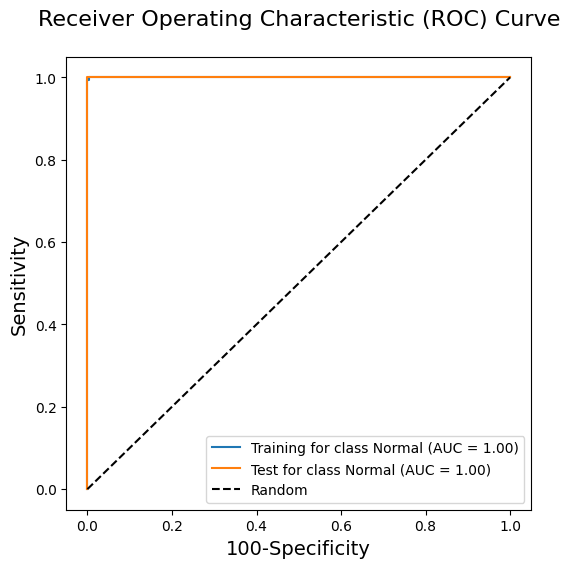

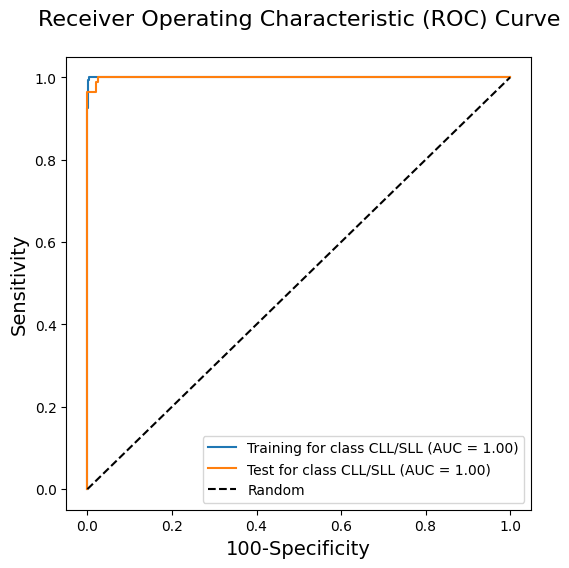

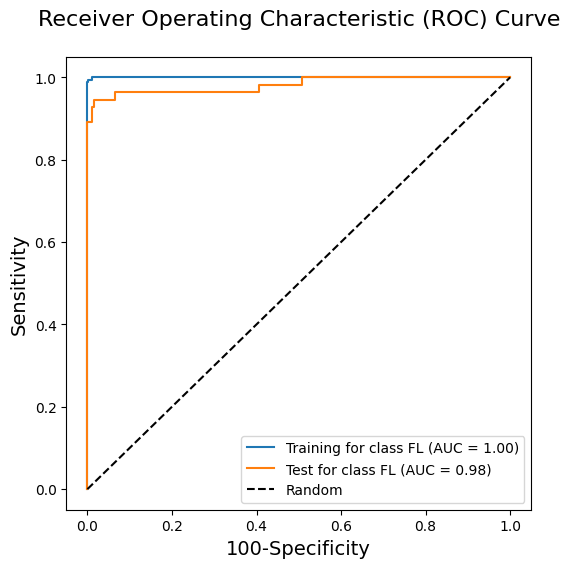

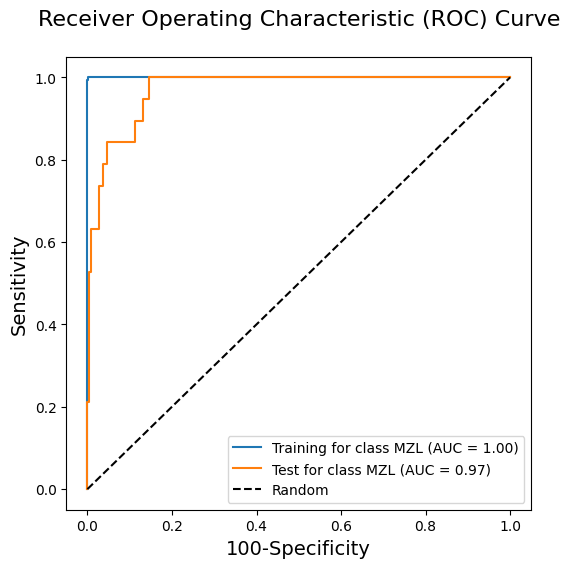

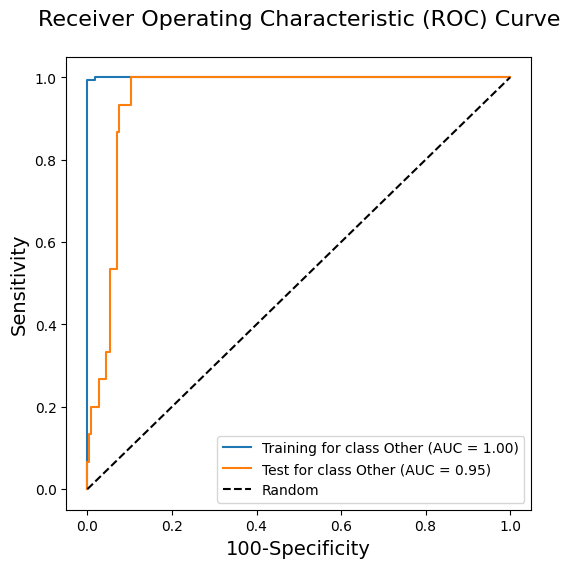

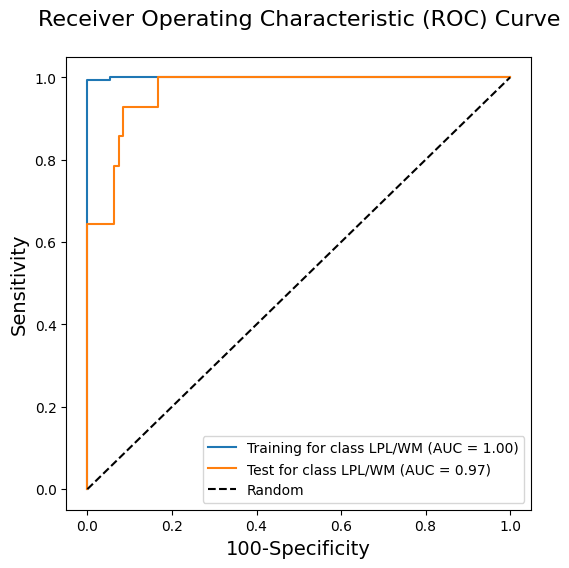

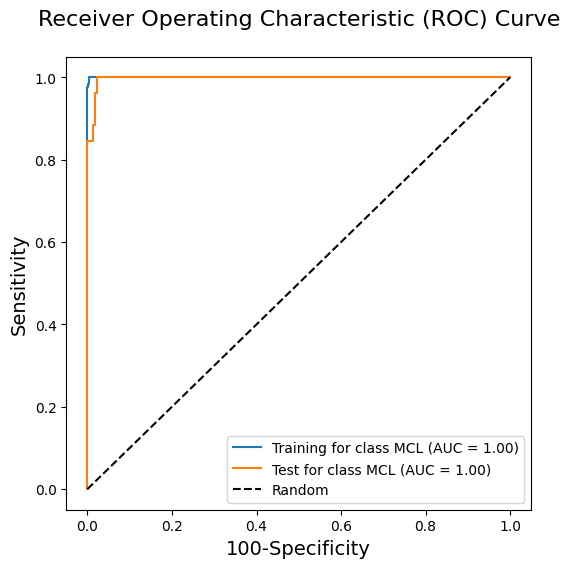

In [36]:
for i in range(y_test_true.shape[1]):
    
    fig, ax = plt.subplots(figsize=(6,6),dpi=100)
    plt.plot(fpr[i], tpr[i], label='Training for class %s (AUC = %0.2f)' % (sub[i],roc_auc[i]))
    plt.plot(fpr_t[i],tpr_t[i], label='Test for class %s (AUC = %0.2f)' % (sub[i],roc_auc_t[i]))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('100-Specificity', fontsize=14)
    plt.ylabel('Sensitivity', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve\n', fontsize=16)
    plt.legend(loc='lower right')
    plt.show()

In [56]:
importance=grad.feature_importances_
feat=pd.DataFrame({'Features': X.columns,'Importance': importance})
feat=feat.sort_values('Importance',ascending=False)
#Top 20 features for the random
feat=feat.head(500)
feat.to_csv('Important_Features(2).csv', index=False)
# for i in range(len(feat)):
#     print(feat.iloc[i])

In [97]:
similar=pd.read_csv("C:/Users/bless/OneDrive/MS_Studies/AML/assignment5/gse183030/similar.csv")
anno=pd.read_csv("C:/Users/bless/OneDrive/MS_Studies/AML/assignment5/GO_Annotated.csv")
#sim_data=pd.DataFrame('Features')
sim_fea=[]
#print(anno.columns)
#print(similar.columns)
#print(similar)
for i in range(len(anno)):
    for j in range(len(similar)):
        if(anno.iloc[i]['Gene_Symbol']==similar.iloc[j]['x']):
            sim_fea.append(anno.iloc[i]['Features'])
sim_X=pd.DataFrame()
#sim_X['Sample']=merged_diff['Sample']
# sim_fea=pd.DataFrame(sim_fea)
# sim_fea
for i in sim_fea:
    #print(i)
    sim_X[i]=merged_diff[i]
    #print(merged_diff[i])
#print(sim_X)
sim_X

#print(sim_fea)


,214446_at,208243_s_at,213436_at,215368_at,204014_at,205414_s_at,212386_at,223185_s_at,232204_at,226625_at
0,363.24674,12.719146,215.851608,58.164116,253.381632,63.951658,7115.582508,141.535893,2599.722778,118.435044
1,104.956205,18.761423,119.045874,109.674836,188.313183,150.891793,7230.553904,163.492955,2196.55141,161.113876
2,39.54568,49.775026,62.942252,100.111297,267.285579,1382.21274,25499.41203,19.780655,233.676719,2248.00724
3,38.806887,5.546667,26.52905,23.980222,13.648613,31.028935,1085.204237,15.138025,211.87427,1292.021551
4,29.166566,17.364967,106.204808,125.040434,40.316986,911.210327,17668.26141,19.544091,61.208612,502.102285
...,...,...,...,...,...,...,...,...,...,...
713,874.4,101.5,131.5,72.3,13.0,234.4,3614.9,805.1,1068.7,375.7
714,2797.0,123.5,10.7,64.7,13.3,50.4,50.7,510.5,39.4,216.3
715,57.8,24.4,68.6,236.9,447.9,37.4,11387.5,293.3,922.7,1365.4
716,413.7,530.9,1368.7,204.5,161.7,87.0,1905.1,458.9,425.4,607.7


In [98]:
#Now we have a new dataset with the common genes we found from the paper when compared to the
#important genes we found from our analysis
simX_train,simX_test,simY_train,simY_test=train_test_split(sim_X,Y,test_size=1/3,stratify=Y,random_state=0)

In [99]:
smote=SMOTE(k_neighbors=3)
#adasyn = ADASYN(random_state=20)
simXr, simYr=smote.fit_resample(simX_train,simY_train)
simuni_y,co=np.unique(simYr,return_counts=True)
for x, y in zip(simuni_y,co):
    print(f"Class {x}:{y}")

Class 0:172
Class 1:172
Class 2:172
Class 3:172
Class 4:172
Class 5:172
Class 6:172


In [101]:
probabilities=cross_val_predict(estimator,simXr,simYr,cv=kfold,method='predict_proba')

In [107]:
max_in=np.argmax(probabilities,axis=1)
#max_in
max_in

array([4, 5, 2, ..., 6, 6, 6], dtype=int64)

In [108]:
accu_train=accuracy_score(simYr,max_in)
accu_train

0.9609634551495017

In [109]:
grad=estimator.fit(simXr,simYr)
test_pro=grad.predict_proba(simX_test)

In [110]:
max_ini=np.argmax(test_pro,axis=1)
max_ini 

array([3, 0, 3, 1, 4, 1, 1, 3, 1, 0, 4, 6, 3, 3, 6, 4, 2, 1, 1, 1, 3, 0,
       6, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 4, 1, 1, 6, 5, 3, 3, 2,
       5, 2, 1, 3, 1, 3, 1, 2, 2, 1, 1, 4, 1, 3, 2, 3, 6, 2, 2, 0, 3, 0,
       6, 3, 4, 2, 1, 1, 6, 0, 2, 6, 1, 0, 3, 2, 5, 0, 1, 2, 1, 1, 2, 1,
       3, 0, 0, 5, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 2, 6, 1, 3, 5, 2, 2, 3,
       2, 1, 6, 1, 1, 1, 2, 1, 2, 0, 4, 0, 1, 0, 6, 1, 4, 1, 0, 2, 1, 1,
       2, 1, 4, 3, 4, 1, 5, 4, 1, 1, 6, 4, 0, 2, 6, 1, 2, 6, 1, 2, 0, 1,
       0, 1, 2, 1, 2, 1, 1, 1, 1, 6, 6, 1, 1, 2, 1, 1, 0, 1, 1, 3, 2, 0,
       1, 2, 2, 2, 6, 2, 2, 4, 1, 0, 1, 1, 4, 1, 4, 1, 4, 1, 6, 2, 1, 1,
       2, 1, 1, 2, 2, 6, 2, 3, 6, 3, 6, 0, 4, 2, 2, 0, 0, 3, 2, 1, 6, 1,
       3, 2, 1, 6, 5, 5, 2, 2, 1, 1, 6, 1, 1, 0, 0, 1, 6, 2, 1, 2],
      dtype=int64)

In [111]:
accu_test=accuracy_score(simY_test,max_ini)
accu_test

0.825

In [114]:
simtrain=probabilities
simy_true = label_binarize(simYr, classes=np.unique(simYr))
simytrain_pred=max_in

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(simy_true.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(simy_true[:, i], simtrain[:, i])
    roc_auc[i] = roc_auc_score(simy_true[:, i], simtrain[:, i])

# Print the ROC AUC scores for each class
for i in range(simy_true.shape[1]):
    print("Class {}: ROC AUC for train = {:.3f}".format(i, roc_auc[i]))
    
print("***************************************")
    
#for Test aucs
simtest=test_pro
simy_test_true=label_binarize(simY_test, classes=np.unique(simY_test))
fpr_t =dict()
tpr_t=dict()
roc_auc_t=dict()
for i in range(simy_test_true.shape[1]):
    fpr_t[i],tpr_t[i],_=roc_curve(simy_test_true[:,i],simtest[:,i])
    roc_auc_t[i]=roc_auc_score(simy_test_true[:,i],simtest[:,i])
for i in range(simy_test_true.shape[1]):
    print("Class {}: ROC AUC for test = {:.3f}".format(i, roc_auc_t[i]))

Class 0: ROC AUC for train = 0.991
Class 1: ROC AUC for train = 0.992
Class 2: ROC AUC for train = 0.998
Class 3: ROC AUC for train = 0.998
Class 4: ROC AUC for train = 0.998
Class 5: ROC AUC for train = 0.998
Class 6: ROC AUC for train = 0.999
***************************************
Class 0: ROC AUC for test = 0.999
Class 1: ROC AUC for test = 0.986
Class 2: ROC AUC for test = 0.995
Class 3: ROC AUC for test = 0.967
Class 4: ROC AUC for test = 0.829
Class 5: ROC AUC for test = 0.931
Class 6: ROC AUC for test = 0.937


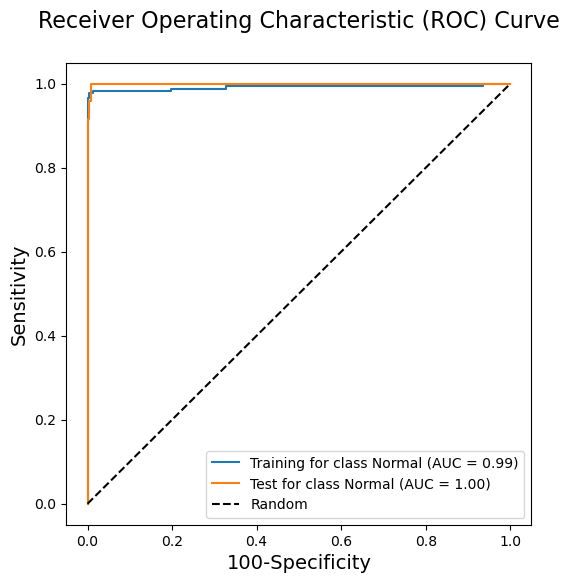

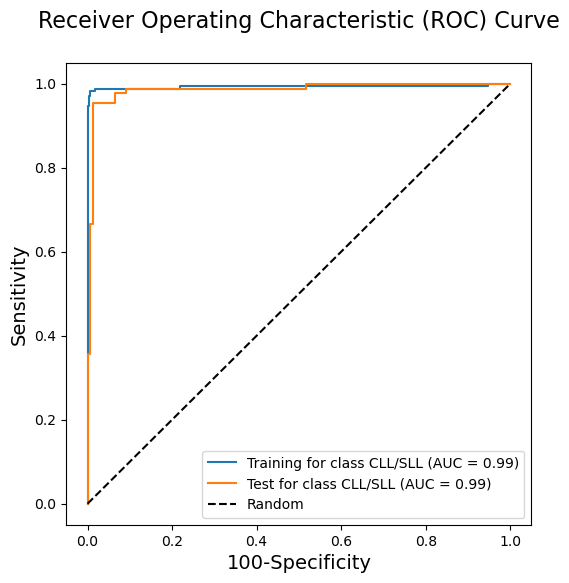

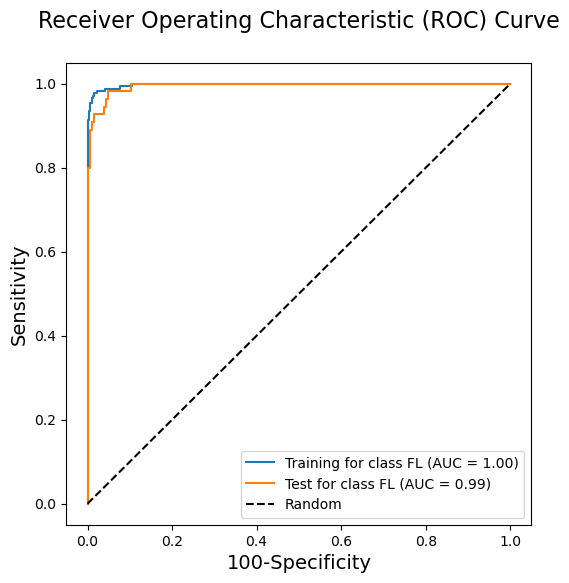

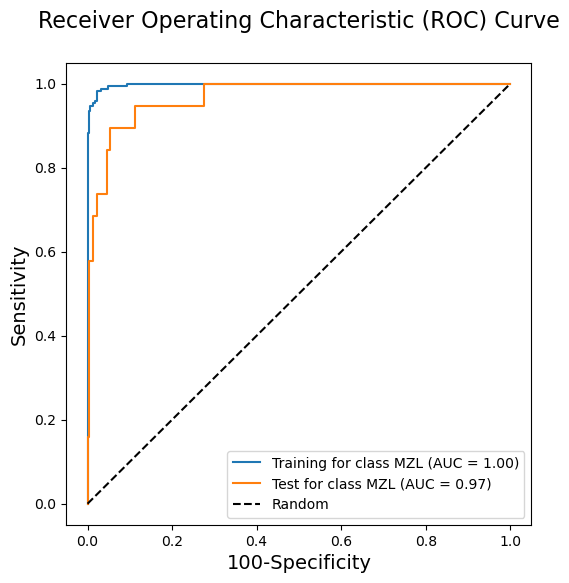

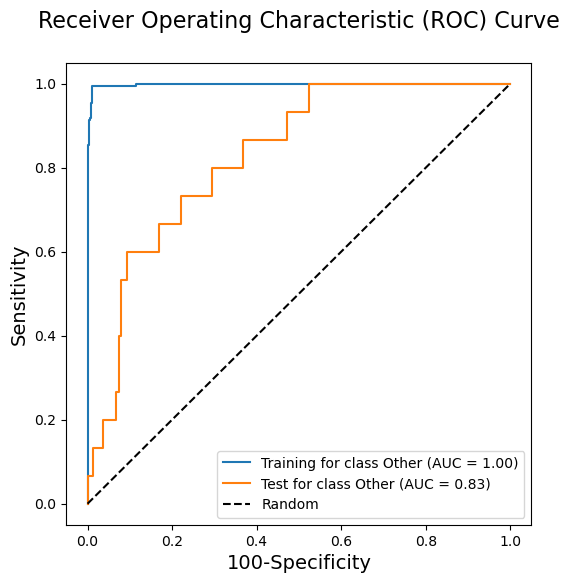

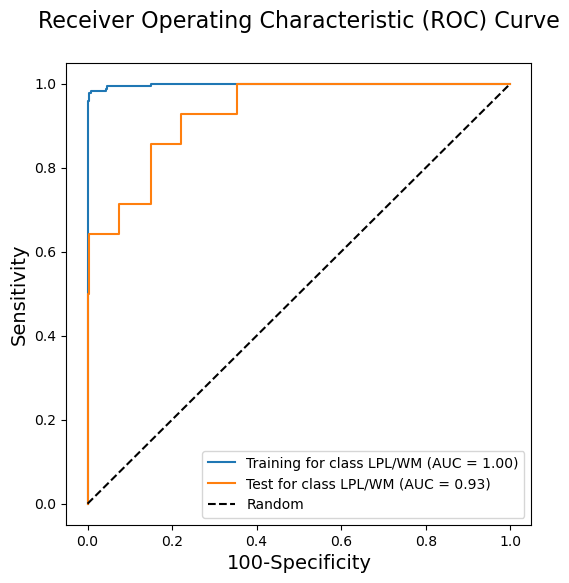

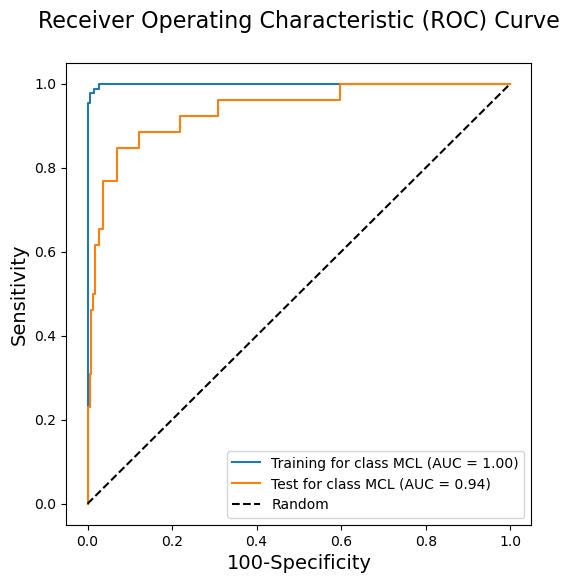

In [115]:
for i in range(simy_test_true.shape[1]):
    
    fig, ax = plt.subplots(figsize=(6,6),dpi=100)
    plt.plot(fpr[i], tpr[i], label='Training for class %s (AUC = %0.2f)' % (sub[i],roc_auc[i]))
    plt.plot(fpr_t[i],tpr_t[i], label='Test for class %s (AUC = %0.2f)' % (sub[i],roc_auc_t[i]))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('100-Specificity', fontsize=14)
    plt.ylabel('Sensitivity', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve\n', fontsize=16)
    plt.legend(loc='lower right')
    plt.show()